[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eneskelestemur/MolecularModeling/blob/main/Labs/lab03_molecular_representations/Molecular_representations.ipynb)

# Molecular Representations

Molecular representations are essential tools that allow us to describe the structure and properties of molecules in a format suitable for computational analysis. They capture key details like the types of atoms, how they're connected, and their spatial arrangements. Common representations include SMILES strings, molecular graphs, and chemical descriptors, each serving different purposes in tasks like predicting molecular behavior, searching databases, or modeling chemical reactions. These representations are widely used in fields like drug discovery and materials science, providing a bridge between complex molecular structures and computational tools. This lab will only cover the molecular representations, and in the next lab, these representations will be used for chemical data processing and visualization.

**Topics:**

* [Distance and Similarity Metrics](#distance-and-similarity-metrics)
* [Descriptor Representations](#descriptor-representations)
* [Language Respresentations](#language-representations)
* [Graph Representations](#graph-representations)

## Distance and Similarity Metrics

### Table of Contents

1. [Euclidean Distance](#euclidean-distance)
2. [Manhattan Distance](#manhattan-distance)
3. [Chebyshev Distance](#chebyshev-distance)
4. [Minkowski Distance](#minkowski-distance)
5. [Hamming Distance](#hamming-distance)
6. [Jaccard Distance and Tanimoto Similarity](#jaccard-distance-and-tanimoto-similarity)
7. [Dice Similarity](#dice-distance)
8. [Cosine Similarity](#cosine-similarity)

[[ 0.48253529  5.35132127]
 [-1.77102064  5.10395911]
 [-1.76435827  3.99484034]
 [-0.98844031  2.40253479]
 [-3.15200843  3.88862678]]
[0 0 0 0 0]


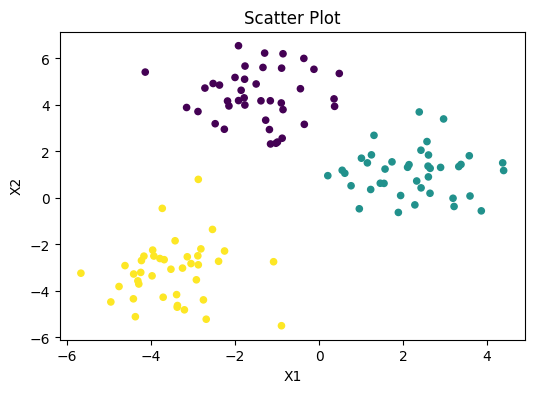

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

# before going through the distance metrics,
# let's define a few helper functions

# generate random data for clustering
def get_cluster_data(n_clusters, n_samples, n_features, random_state=42):
    X, y = datasets.make_blobs(
        n_samples=n_samples, n_features=n_features, 
        centers=n_clusters, random_state=random_state,
        cluster_std=1.1, center_box=(-5.0, 5.0), shuffle=False
    )
    return X, y

# plot scatter plot for X and color by y
def plot_scatter(X, y=None):
    plt.figure(figsize=(6, 4))
    if y is not None:
        plt.scatter(X[:, 0], X[:, 1], c=y, s=20)
    else:
        plt.scatter(X[:, 0], X[:, 1], s=20)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Scatter Plot')
    plt.show()

# plot heatmap with clustering based on distance
def plot_clustermap(dist_matrix):
    sns.clustermap(dist_matrix, cmap='Reds_r', figsize=(5, 5))
    plt.title('Clustermap')
    plt.show()

# let's generate some data for the next section
n_clusters = 3
n_samples = 120
n_features = 2
X, y = get_cluster_data(n_clusters, n_samples, n_features)
print(X[:5])
print(y[:5])
plot_scatter(X, y)

### Euclidean Distance

<div style="text-align: center"><img src="images/euclidean.png" width="20%"></div>

**Definition**: It is the most common distance metric, often referred to as the straight-line distance between two points in Euclidean space.

**Formula**: For two points $p = (p_1, p_2, \ldots, p_n)$ and $q = (q_1, q_2, \ldots, q_n)$, the Euclidean distance is:

$$ d(p, q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2} $$

**Usage**: Commonly used in clustering algorithms like K-means and in nearest neighbor searches.


In [2]:
import numpy as np

# Since this is the first example, let's manually
# calculate the Euclidean distance between two points
def euclidean_distance(vector1, vector2):
    return np.sqrt(np.sum((vector1 - vector2) ** 2))

p1 = np.array([1, 2])
p2 = np.array([3, 4])
print(euclidean_distance(p1, p2))

2.8284271247461903


In [3]:
from sklearn.metrics import DistanceMetric

# Hopefullly, we don't have to define every function
# from scratch. We can use the DistanceMetric class
# from sklearn.metrics to calculate the distance.
p1 = np.array([1, 2])
p2 = np.array([3, 4])
euclidean = DistanceMetric.get_metric('euclidean')
distance = euclidean.pairwise([p1, p2])
print(distance)

[[0.         2.82842712]
 [2.82842712 0.        ]]


c:\Users\adamf\miniconda3\envs\MolecularModeling\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\adamf\miniconda3\envs\MolecularModeling\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\adamf\miniconda3\envs\MolecularModeling\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\adamf\miniconda3\envs\MolecularModeling\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


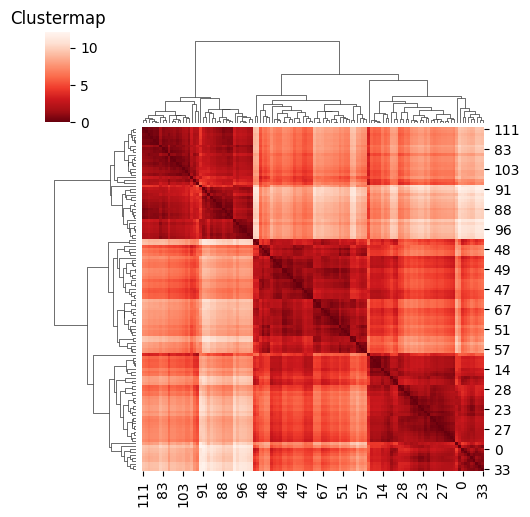

In [4]:
# Let's calculate the distance matrix for the data
# we generated earlier
euclidean = DistanceMetric.get_metric('euclidean')
dist_matrix = euclidean.pairwise(X)

# Let's plot the heatmap
plot_clustermap(dist_matrix)

### Manhattan Distance

<div style="text-align: center"><img src="images/manhattan.png" width="20%"></div>

**Definition**: Also known as the L1 distance or city block distance, it measures the absolute sum of the differences between the coordinates of the points.

**Formula**: For two points $ p $ and $ q $:

$$ d(p, q) = \sum_{i=1}^{n} |p_i - q_i| $$

**Usage**: Useful when the path (like streets on a grid) matters or in cases where diagonal movement is not possible.


c:\Users\adamf\miniconda3\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\adamf\miniconda3\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\adamf\miniconda3\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\adamf\miniconda3\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


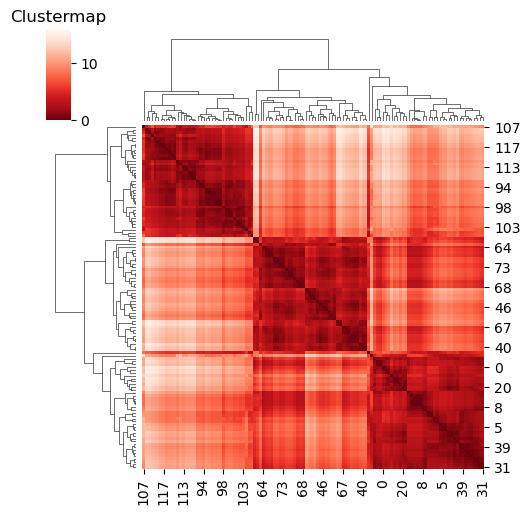

In [12]:
# No need to implement the Manhattan distance from scratch
# We can use the DistanceMetric class
manhattan = DistanceMetric.get_metric('manhattan')
dist_matrix = manhattan.pairwise(X)
plot_clustermap(dist_matrix)

### Chebyshev Distance

<div style="text-align: center"><img src="images/chebyshev.png" width="20%"></div>

**Definition**: This metric measures the maximum absolute difference between the coordinates of two points.

**Formula**: For two points $ p $ and $ q $:

$$ d(p, q) = \max(|p_i - q_i|) $$

**Usage**: Used in scenarios where only the maximum step size matters, such as in chess (king's movement).


c:\Users\adamf\miniconda3\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\adamf\miniconda3\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\adamf\miniconda3\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\adamf\miniconda3\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


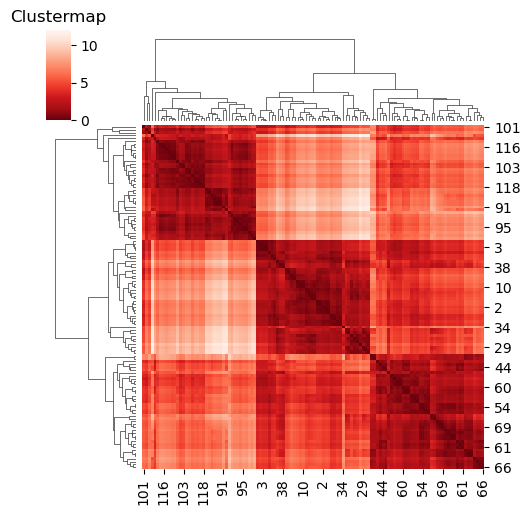

In [13]:
# Distance Matrix using Chebyshev distance
chebyshev = DistanceMetric.get_metric('chebyshev')
dist_matrix = chebyshev.pairwise(X)
plot_clustermap(dist_matrix)

### Minkowski Distance

<div style="text-align: center"><img src="images/minkowski.png" width="20%"></div>

**Definition**: A generalized metric that includes Euclidean and Manhattan distances as special cases.

**Formula**: For two points $ p $ and $ q $:

$$ d(p, q) = \left(\sum_{i=1}^{n} |p_i - q_i|^p\right)^{\frac{1}{p}} $$

**Special Cases**:
- When $ p = 1 $, it is equivalent to Manhattan distance.
- When $ p = 2 $, it is equivalent to Euclidean distance.
- As $ p \to \infty $, it approaches the Chebyshev distance.

**Usage**: Allows flexibility in choosing the distance metric by adjusting the parameter $ p $.


c:\Users\adamf\miniconda3\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\adamf\miniconda3\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\adamf\miniconda3\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\adamf\miniconda3\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


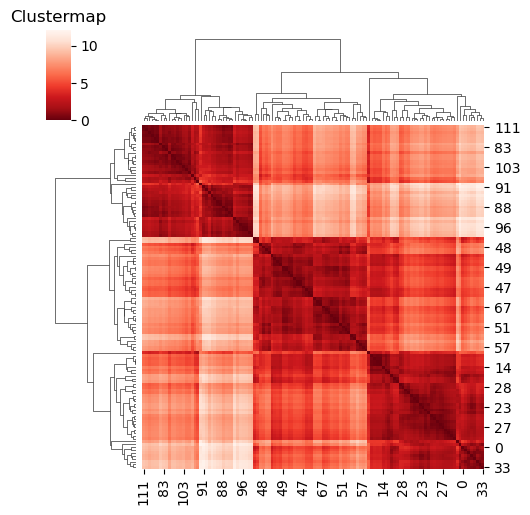

In [14]:
# Distance Matrix using Minkowski distance
minkowski = DistanceMetric.get_metric('minkowski')
dist_matrix = minkowski.pairwise(X)
plot_clustermap(dist_matrix)

### Hamming Distance

<div style="text-align: center"><img src="images/hamming.png" width="20%"></div>

**Definition**: Hamming Distance is a metric used to measure the difference between two strings of equal length. It calculates the number of positions at which the corresponding symbols are different.

**Formula**: For two strings $ s_1 $ and $ s_2 $ of equal length:

$$ d(s_1, s_2) = \sum_{i=1}^{n} \text{(if } s_1[i] \neq s_2[i] \text{ then } 1 \text{ else } 0) $$

where $ n $ is the length of the strings, and $ s_1[i] $ and $ s_2[i] $ are the characters at the $ i $-th position of strings $ s_1 $ and $ s_2 $.

**Example**: For the binary strings `1011101` and `1001001`:
- Compare each bit: 
  - Position 1: 1 vs 1 (same)
  - Position 2: 0 vs 0 (same)
  - Position 3: 1 vs 0 (different)
  - Position 4: 1 vs 1 (same)
  - Position 5: 1 vs 0 (different)
  - Position 6: 0 vs 0 (same)
  - Position 7: 1 vs 1 (same)

The Hamming distance is 2 because there are two positions where the bits are different. To compare values between differenct context, a good normalization method is divide the distance score by the length of the string.

**Usage**: 
- **Error Detection and Correction**: Used in error detection and correction codes, such as Hamming codes, which can detect and correct single-bit errors in data transmission.
- **Genomics**: Used to compare genetic sequences to find mutations or differences.
- **Information Theory**: Helps in finding the minimum distance between code words in coding theory.

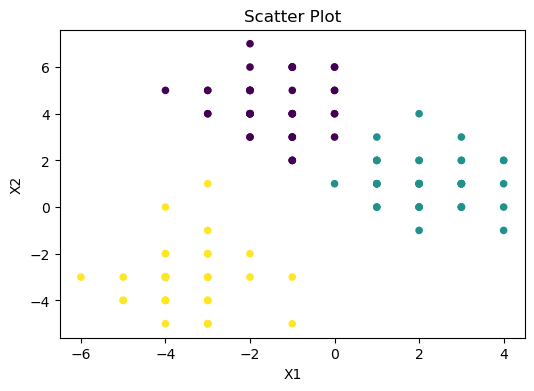

c:\Users\adamf\miniconda3\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\adamf\miniconda3\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\adamf\miniconda3\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\adamf\miniconda3\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


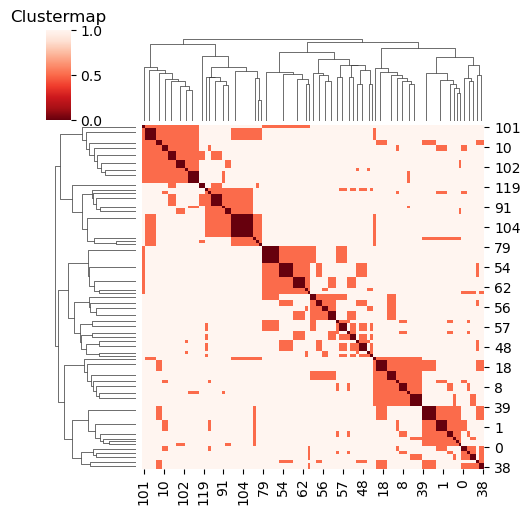

In [15]:
# Hamming distance is different than the previous ones
# because it is used for categorical data. Thus, we need
# to operate on integers instead of real numbers. Also, 
# using the Hamming distance with low-dimensional data
# is not recommended because it may not be very informative.
X_int = np.round(X, decimals=0).astype(int)

# let's visualize the data
plot_scatter(X_int, y)

# Distance Matrix using Hamming distance
hamming = DistanceMetric.get_metric('hamming')
dist_matrix = hamming.pairwise(X_int)
plot_clustermap(dist_matrix)

c:\Users\adamf\miniconda3\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\adamf\miniconda3\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\adamf\miniconda3\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\adamf\miniconda3\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


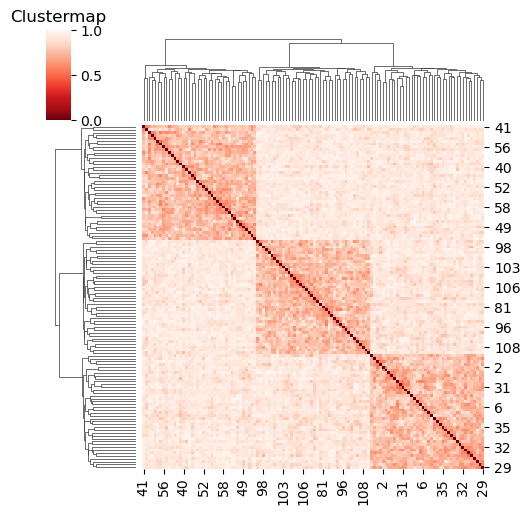

In [16]:
# now create a new data with more dimensions
n_features = 32
X, y = get_cluster_data(n_clusters, n_samples, n_features)

# convert the data to integers
X_int = np.round(X, decimals=0).astype(int)

# Distance Matrix using Hamming distance
hamming = DistanceMetric.get_metric('hamming')
dist_matrix = hamming.pairwise(X_int)
plot_clustermap(dist_matrix)

### Jaccard Distance and Tanimoto Similarity

<div style="text-align: center"><img src="images/jaccard.png" width="20%"></div>

**Definition**: Jaccard Distance measures dissimilarity between two sets, while Tanimoto similarity measures the similarity.

**Formula**:
- **Jaccard Distance**: For two sets $ A $ and $ B $:

$$ d(A, B) = 1 - \frac{|A \cap B|}{|A \cup B|} $$

- **Tanimoto Similarity**: It can be used similarly in the context of binary vectors:

$$ d(A, B) = \frac{|A \cap B|}{|A \cup B|} $$


c:\Users\adamf\miniconda3\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\adamf\miniconda3\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\adamf\miniconda3\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\adamf\miniconda3\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


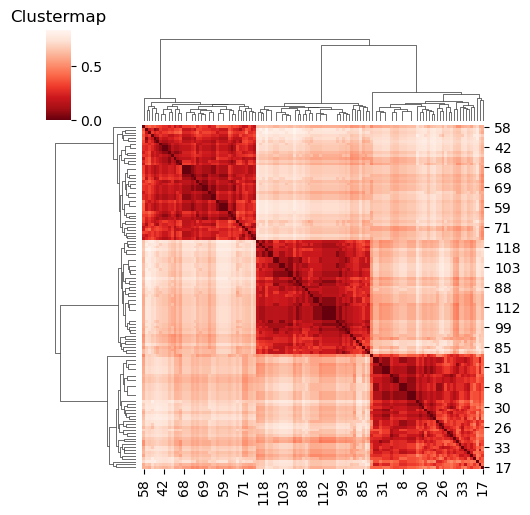

In [17]:
# Jaccard distance is different than the Hamming distance
# because it operates on binary data. Thus, we need to
# binarize the data before calculating the distance.
# Let's create a new data and binarize it.
n_features = 32
X, y = get_cluster_data(n_clusters, n_samples, n_features)
X_bin = (X > 0).astype(int)

# Distance Matrix using Jaccard distance
jaccard = DistanceMetric.get_metric('jaccard')
dist_matrix = jaccard.pairwise(X_bin)
plot_clustermap(dist_matrix)

### Dice Similarity

<div style="text-align: center"><img src="images/dice.png" width="20%"></div>

**Definition**: A similarity metric that calculates the overlap between two sets.

**Formula**: For two sets $ A $ and $ B $:

$$ S(A, B) = \frac{2 \times |A \cap B|}{|A| + |B|} $$

**Usage**: Often used in image segmentation, and its value ranges between 0 (no overlap) and 1 (identical sets).


c:\Users\adamf\miniconda3\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\adamf\miniconda3\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\adamf\miniconda3\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\adamf\miniconda3\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


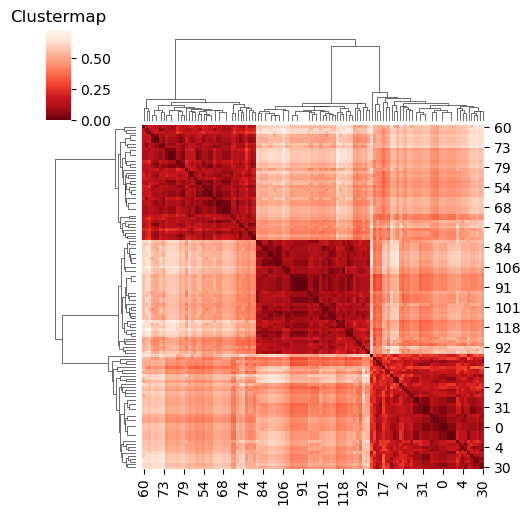

In [18]:
# Dice similarity is very similar to the Jaccard distance
# but it is more sensitive to the differences between
# the two sets. Let's calculate the distance matrix
# using the Dice similarity.
dice = DistanceMetric.get_metric('dice')
dist_matrix = dice.pairwise(X_bin)
plot_clustermap(dist_matrix)

### Cosine Similarity

<div style="text-align: center"><img src="images/cosine.png" width="20%"></div>

**Definition**: Measures the cosine of the angle between two vectors, representing how similar their directions are regardless of their magnitude.

**Formula**: For two vectors $ p $ and $ q $:

$$ S(p, q) = \frac{p \cdot q}{\|p\| \|q\|} $$

where $ p \cdot q $ is the dot product, and $ \|p\| $ and $ \|q\| $ are the magnitudes of the vectors.

**Usage**: Commonly used in text analysis and information retrieval, such as measuring document similarity in vector space models.

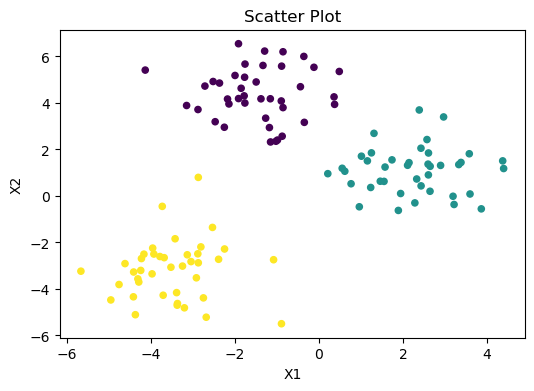

c:\Users\adamf\miniconda3\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\adamf\miniconda3\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


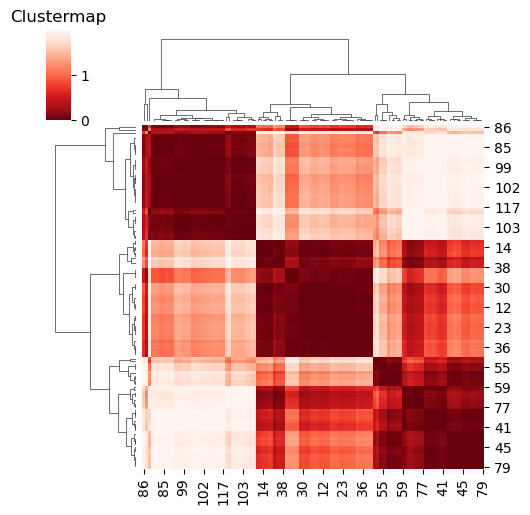

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

# Cosine similarity is a popular distance metric for
# text data and high-dimensional data. Let's calculate
# the distance matrix using the cosine similarity.
n_features = 2
X, y = get_cluster_data(n_clusters, n_samples, n_features)
plot_scatter(X, y)

# Distance Matrix using Cosine similarity
distance_matrix = 1 - cosine_similarity(X)
plot_clustermap(distance_matrix)

## Descriptor Representations

### Table of Contents

1. [Chemical Descriptors](#chemical-descriptors)
2. [Fingerprints](#fingerprints)

### Chemical Descriptors

Chemical descriptors are numerical values that describe properties of molecules, capturing their structural and chemical characteristics. These descriptors can include molecular weight, logP (octanol-water partition coefficient), hydrogen bond donors and acceptors, and more complex descriptors like topological or geometrical features. They are widely used in cheminformatics to predict molecular behavior, such as biological activity or reactivity, and are essential for QSAR (Quantitative Structure-Activity Relationship) models.

The following examples demonstrate how chemical descriptors can be used to represent a given molecule.

In [5]:
import pandas as pd

# let's get a sample data to use for the examples
sample_smiles = pd.read_csv('data/sample_smiles.csv')
sample_smiles.head()

,SMILES
0,CC1(C)N=C(N)N=C(N)N1c1ccc(OCc2ccc(Cl)c(Cl)c2)cc1
1,CC(CN1CCOCC1)n1cc(C(=O)c2ccccc2F)c2ccccc21
2,Cc1ccc([C@H]2OC(=O)O[C@]2(Cn2cncn2)c2ccc(C)cc2...
3,C=C=CCN(C)C(C)Cc1ccccc1
4,Fc1ccccc1Cn1cnc2c(NC3CCCC3)ncnc21


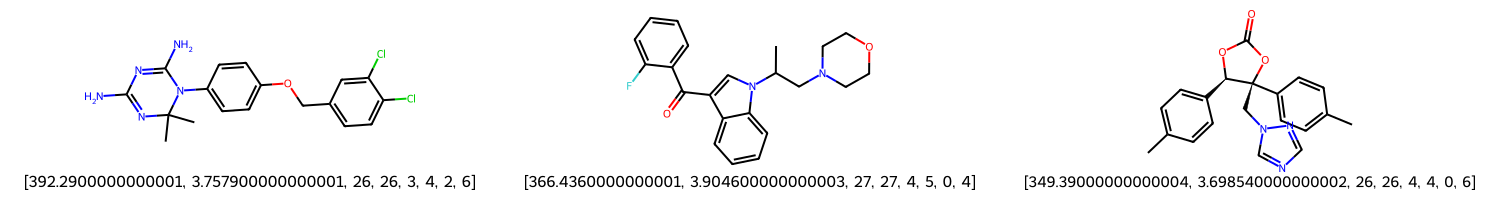

In [6]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw

# let's start with a simple molecular representation
def my_molecular_representation(mol):
    # Calculate selected molecular descriptors
    mol_weight = Descriptors.MolWt(mol)
    log_p = Descriptors.MolLogP(mol)
    num_atoms = mol.GetNumAtoms()
    num_heavy_atoms = mol.GetNumHeavyAtoms()
    num_rings = mol.GetRingInfo().NumRings()
    num_rotatable_bonds = Descriptors.NumRotatableBonds(mol)
    num_h_donors = Descriptors.NumHDonors(mol)
    num_h_acceptors = Descriptors.NumHAcceptors(mol)
    # make a list of the calculated features
    feature_vector = [mol_weight, log_p, num_atoms, num_heavy_atoms, 
                      num_rings, num_rotatable_bonds, num_h_donors, 
                      num_h_acceptors]
    return feature_vector   # return the list

# let's use our function to calculate molecular descriptors for the first 5 molecules
mol_features = [] # create an empty list to store the calculated features
for smi in sample_smiles['SMILES']:     # iterate over SMILES
    mol = Chem.MolFromSmiles(smi)       # convert SMILES to RDKit mol object
    features = my_molecular_representation(mol)     # calculate molecular descriptors
    mol_features.append(features)       # append to the list

# let's display our molecules and calculated features
mols = [Chem.MolFromSmiles(smi) for smi in sample_smiles['SMILES']] # convert SMILES to RDKit mol objects
img = Draw.MolsToGridImage(     # display molecules and calculated features
    mols[:3], molsPerRow=3, subImgSize=(500, 200),
    legends=[str(features) for features in mol_features[:3]]
)
img

Although `my_molecular_representation` captures some information about the molecule, it is probably missing a lot of information about the structure. This is a perfectly fine way to process a chemical structure, but for completeness, let's use all available RDKit descriptors to represent our molecules.

In [7]:
import numpy as np

# let's make a function that takes a mol and returns the feature vector
def get_rdkit_descriptors(mol):
    feature_vector = []    # create an empty list to store the calculated descriptors
    for desc_name, desc_func in Descriptors._descList:  # iterate over all available descriptors
        calculated_desc = desc_func(mol)    # calculate the descriptor
        feature_vector.append(calculated_desc)    # append to the list
    return feature_vector

# now get the features for the sample data
mol_features = []
for smi in sample_smiles['SMILES']:
    mol = Chem.MolFromSmiles(smi)
    features = get_rdkit_descriptors(mol)
    mol_features.append(features)
mol_features = np.array(mol_features)    # numpy array is more convenient to work with
print(f"Shape of the feature matrix: {mol_features.shape}")
mol_features[:5]

[14:56:52] DEPRECATION WARNING: please use MorganGenerator
[14:56:52] DEPRECATION WARNING: please use MorganGenerator
[14:56:52] DEPRECATION WARNING: please use MorganGenerator
[14:56:52] DEPRECATION WARNING: please use MorganGenerator
[14:56:52] DEPRECATION WARNING: please use MorganGenerator
[14:56:52] DEPRECATION WARNING: please use MorganGenerator
[14:56:52] DEPRECATION WARNING: please use MorganGenerator
[14:56:52] DEPRECATION WARNING: please use MorganGenerator
[14:56:52] DEPRECATION WARNING: please use MorganGenerator
[14:56:52] DEPRECATION WARNING: please use MorganGenerator
[14:56:52] DEPRECATION WARNING: please use MorganGenerator
[14:56:52] DEPRECATION WARNING: please use MorganGenerator
[14:56:52] DEPRECATION WARNING: please use MorganGenerator
[14:56:52] DEPRECATION WARNING: please use MorganGenerator
[14:56:52] DEPRECATION WARNING: please use MorganGenerator
[14:56:52] DEPRECATION WARNING: please use MorganGenerator
[14:56:52] DEPRECATION WARNING: please use MorganGenerat

Shape of the feature matrix: (200, 210)


[14:56:55] DEPRECATION WARNING: please use MorganGenerator
[14:56:55] DEPRECATION WARNING: please use MorganGenerator
[14:56:55] DEPRECATION WARNING: please use MorganGenerator
[14:56:55] DEPRECATION WARNING: please use MorganGenerator
[14:56:55] DEPRECATION WARNING: please use MorganGenerator
[14:56:55] DEPRECATION WARNING: please use MorganGenerator


array([[ 6.03668132,  6.03668132,  0.17160072, ...,  0.        ,
         0.        ,  0.        ],
       [14.15401736, 14.15401736,  0.112255  , ...,  0.        ,
         0.        ,  0.        ],
       [12.18834908, 12.18834908,  0.30589687, ...,  0.        ,
         0.        ,  0.        ],
       [ 3.56874475,  3.56874475,  0.53888889, ...,  0.        ,
         0.        ,  0.        ],
       [13.85260005, 13.85260005,  0.21508314, ...,  0.        ,
         0.        ,  0.        ]])

### Fingerprints

Fingerprints are binary or count vectors that encode the presence or absence of particular substructures or features in a molecule. They are commonly used for molecular similarity searches, clustering, and classification. Fingerprints can be structural (e.g., based on paths, substructures) or property-based (e.g., pharmacophore features). Popular types include MACCS keys, Morgan (circular) fingerprints, and ECFP (Extended-Connectivity Fingerprints). They provide a compact representation that allows efficient comparison of molecules in large databases.

In the following examples, some of the basic fingerprint methods are demonstrated.

In [8]:
import pandas as pd

# get a sample data to use for the examples
sample_smiles = pd.read_csv('data/sample_smiles.csv')
sample_smiles.head()

,SMILES
0,CC1(C)N=C(N)N=C(N)N1c1ccc(OCc2ccc(Cl)c(Cl)c2)cc1
1,CC(CN1CCOCC1)n1cc(C(=O)c2ccccc2F)c2ccccc21
2,Cc1ccc([C@H]2OC(=O)O[C@]2(Cn2cncn2)c2ccc(C)cc2...
3,C=C=CCN(C)C(C)Cc1ccccc1
4,Fc1ccccc1Cn1cnc2c(NC3CCCC3)ncnc21


In [9]:
import numpy as np
np.set_printoptions(edgeitems=15)
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator

# before we start calculating fingerprints, let's convert the SMILES to RDKit mol objects
mols = [Chem.MolFromSmiles(smi) for smi in sample_smiles['SMILES']]

# first, we need to initialize the fingerprint generator with the desired parameters
mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=3, fpSize=2048)
# the generator has methods to calculate fingerprints for a given molecule
# let's calculate the fingerprint for our molecules
bit_fps = [mfpgen.GetFingerprint(mol).ToList() for mol in mols]     # bit-based fingerprint
count_fps = [mfpgen.GetCountFingerprint(mol).ToList() for mol in mols]   # count-based fingerprint

# convert the fingerprints to numpy arrays for printing
bit_fps = np.array(bit_fps)
count_fps = np.array(count_fps)
print(f"Shape of the bit-based fingerprint matrix: {bit_fps.shape}")
print(bit_fps[10:13])
print(f"Shape of the count-based fingerprint matrix: {count_fps.shape}")
print(count_fps[10:13])

Shape of the bit-based fingerprint matrix: (200, 2048)
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 ... 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Shape of the count-based fingerprint matrix: (200, 2048)
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 ... 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [10]:
# if you are not sure about what parameters are available for the fingerprint generator
# you can use the help function to get more information
help(rdFingerprintGenerator.GetMorganGenerator)

Help on built-in function GetMorganGenerator in module rdkit.Chem.rdFingerprintGenerator:

GetMorganGenerator(...)
    GetMorganGenerator([  (int)radius=3 [, (bool)countSimulation=False [, (bool)includeChirality=False [, (bool)useBondTypes=True [, (bool)onlyNonzeroInvariants=False [, (bool)includeRingMembership=True [, (AtomPairsParameters)countBounds=None [, (int)fpSize=2048 [, (AtomPairsParameters)atomInvariantsGenerator=None [, (AtomPairsParameters)bondInvariantsGenerator=None [, (bool)includeRedundantEnvironments=False]]]]]]]]]]]) -> FingeprintGenerator64 :
        Get a morgan fingerprint generator

          ARGUMENTS:
            - radius:  the number of iterations to grow the fingerprint
            - countSimulation: if set, use count simulation while generating the fingerprint
            - includeChirality: if set, chirality information will be added to the generated fingerprint
            - useBondTypes: if set, bond types will be included as a part of the default bond inv

In [11]:
# there are many other types of fingerprints available in RDKit
# here are a few examples, you can play around with them
rdkgen = rdFingerprintGenerator.GetRDKitFPGenerator(fpSize=2048)
apgen = rdFingerprintGenerator.GetAtomPairGenerator(fpSize=2048)
ttgen = rdFingerprintGenerator.GetTopologicalTorsionGenerator(fpSize=2048)

#### Visualizing Fingerprint Bits

RDKit also contains helpful functions to display fingerprint bits. This can be very useful when building Quantitative Structure-Activity Relationship (QSAR) models to understand what features are important to the model. QSAR models will be discussed in the future labs, and these visualizations will be helpful with identifying important structure information.

In order to display the bits, extra information will be collected after the creation of the fingerprint for a molecule. These are called Bit Information Map that contains what substructures are contained at the specified bit. 

The following example shows how to display the Morgan fingerprint bits, and the default color code is as follows:
 - Blue: central atom in the environment
 - Yellow: aromatic atoms
 - Gray: aliphatic ring atoms

Note that the fingerprint bits are only available for Morgan and RDKit fingerprints.

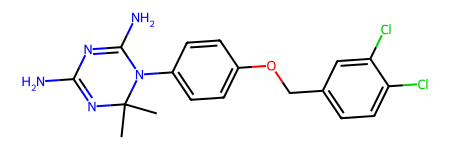

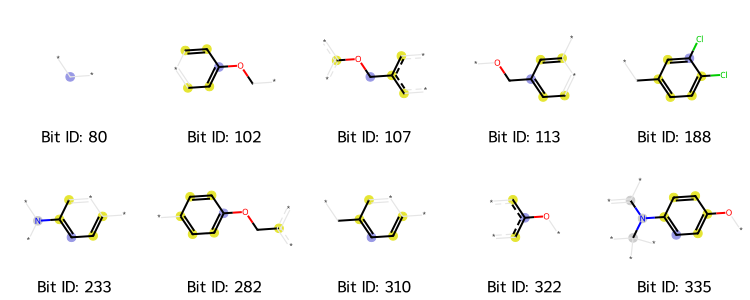

In [12]:
from rdkit.Chem import Draw

# let's start by getting an example molecule
mol = sample_smiles['SMILES'].iloc[0]
mol = Chem.MolFromSmiles(mol)
display(mol)

# now let's calculate the fingerprints
mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=3, fpSize=2048)
# before calculating the fingerprint, to store additional bit information
# we need to initialize the additional output object
ao = rdFingerprintGenerator.AdditionalOutput()
# we also need to ask what additional information we want to allocate
ao.AllocateBitInfoMap()

# Now we can calculate the fingerprint with additional output, 
# which will store the bit information. Bit information is
# essentially a dictionary where the key is the bit index and
# the value is a list of atom indices and radius of the bit. 
# This information can be used to draw the substructure.
fp = mfpgen.GetFingerprint(mol, additionalOutput=ao)
bit_info = ao.GetBitInfoMap()
first_10_bits = list(bit_info.keys())[:10]
bit_list = []
legends = []
for bit_id in first_10_bits:
    bit_list.append((mol, bit_id, bit_info))
    legends.append(f"Bit ID: {bit_id}")
bit_img = Draw.DrawMorganBits(bit_list, molsPerRow=5, legends=legends, useSVG=True)
display(bit_img)

## Language Representations

### Table of Contents

1. [SMILES](#smiles)
2. [SMARTS](#smarts)

### SMILES

[SMILES](https://www.daylight.com/smiles/index.html) (Simplified Molecular Input Line Entry System) is a notation that encodes the structure of a molecule using a string of characters. It represents atoms, bonds, and connectivity in a linear form, allowing easy data entry and manipulation. SMILES strings are widely used for database searches, molecular visualization, and as input for cheminformatics software. The format supports different levels of detail, including stereochemistry and aromaticity, and can be converted back into 2D or 3D structures by cheminformatics tools.

In [13]:
from rdkit import Chem

smiles = 'Cc1ccc([C@H]2OC(=O)O[C@]2(Cn2cncn2)c2ccc(C)cc2)cc1'
mol = Chem.MolFromSmiles(smiles)

# You can get SMILES with different settings using RDKit
default_smiles = Chem.MolToSmiles(
    mol, isomericSmiles=True, kekuleSmiles=False, 
    rootedAtAtom=-1, canonical=True, allBondsExplicit=False,
    allHsExplicit=False, doRandom=False
)
print(f"Default SMILES: {default_smiles}")
default_random_smiles = Chem.MolToSmiles(
    mol, doRandom=True
)
print(f"Default Random SMILES: {default_random_smiles}")
non_canonical_smiles = Chem.MolToSmiles(
    mol, canonical=False
)
print(f"Non-canonical SMILES: {non_canonical_smiles}")
kekule_smiles = Chem.MolToSmiles(
    mol, kekuleSmiles=True
)
print(f"Kekule SMILES: {kekule_smiles}")
non_isomeric_smiles = Chem.MolToSmiles(
    mol, isomericSmiles=False
)
print(f"Non-isomeric SMILES: {non_isomeric_smiles}")


Default SMILES: Cc1ccc([C@H]2OC(=O)O[C@]2(Cn2cncn2)c2ccc(C)cc2)cc1
Default Random SMILES: O1C(=O)O[C@]([C@H]1c1ccc(cc1)C)(Cn1cncn1)c1ccc(C)cc1
Non-canonical SMILES: Cc1ccc([C@H]2OC(=O)O[C@]2(Cn2cncn2)c2ccc(C)cc2)cc1
Kekule SMILES: CC1=CC=C([C@H]2OC(=O)O[C@]2(CN2C=NC=N2)C2=CC=C(C)C=C2)C=C1
Non-isomeric SMILES: Cc1ccc(C2OC(=O)OC2(Cn2cncn2)c2ccc(C)cc2)cc1


We have already been using SMILES to represent our molecules, so instead of talking more about them, I like to introduce how language models can use SMILES. Moreover, we need to understand how computers process text data to enable matrix computations and modeling. 

The first step of any language model is tokenization, where the string is split into meaningful units (tokens) to be represented by integers. For SMILES, tokens could be individual atoms ("C", "O"), bond types, or symbols that denote branching or rings.

After tokenization, each token is mapped to a numerical vector using an embedding layer. This step converts discrete tokens into continuous vectors that capture the relationships and patterns between different tokens. For instance, in language models like Word2Vec or BERT, similar tokens get vectors that are close in the embedding space. For SMILES, this helps in capturing chemical similarities, such as common substructures.

Once tokens are embedded, the entire SMILES string is represented as a sequence of vectors. Language models, like recurrent neural networks (RNNs), transformers, or LSTM models, process these sequences to understand and generate molecular structures. They can learn patterns like typical atom connectivity, common substructures, or even predict new valid SMILES strings.

I will demonstrate this process with a very simple example.

In [14]:
import numpy as np

## let's demonstrate tokenization of SMILES with a simple example
# first, create a pipline to standardize SMILES. This can include
# any preprocessing steps you want to apply to the SMILES.
def standardize_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    standardized_smiles = Chem.MolToSmiles(mol, allBondsExplicit=True)
    return standardized_smiles

# Next, create a tokenizer to split the SMILES into tokens
# and convert them to integers.
def tokenize_smiles(smiles):
    vocab = set(smiles)
    token_to_int = {token: i for i, token in enumerate(vocab)}
    int_to_token = {value: key for key, value in token_to_int.items()}
    tokens = [token_to_int[token] for token in smiles]
    return tokens, token_to_int, int_to_token

# Language models take the tokenized SMILES and embed them
# into a vector space; then, use the embedding to train
# a model that can learn the syntax and semantics of SMILES.
# In order to have a proper embedding, we would use a
# Machine Learning package like TensorFlow or PyTorch.
# For now, we will just demonstrate what the embedding
# would look like.
def initialize_embedding(tokenized_smiles, vocab_size, embedding_size=4):
    embedding = np.random.rand(vocab_size, embedding_size)
    return embedding[tokenized_smiles]
    
# Let's demonstrate the tokenization and embedding
smiles = 'CCC(=O)O'
standardized_smiles = standardize_smiles(smiles)
tokens, token_to_int, int_to_token = tokenize_smiles(standardized_smiles)
embedding = initialize_embedding(tokens, len(token_to_int), embedding_size=4)
print(f"Input SMILES: {smiles}")
print(f"Standardized SMILES: {standardized_smiles}")
print(f"Tokens: {tokens}")
print(f"Token to Integer: {token_to_int}")
print(f"Integer to Token: {int_to_token}")
print(f"Embedding shape: {embedding.shape}")
print(embedding)

Input SMILES: CCC(=O)O
Standardized SMILES: C-C-C(=O)-O
Tokens: [5, 4, 5, 4, 5, 1, 0, 3, 2, 4, 3]
Token to Integer: {'=': 0, '(': 1, ')': 2, 'O': 3, '-': 4, 'C': 5}
Integer to Token: {0: '=', 1: '(', 2: ')', 3: 'O', 4: '-', 5: 'C'}
Embedding shape: (11, 4)
[[0.10531489 0.43575205 0.60422726 0.11444381]
 [0.29554026 0.3437912  0.73891986 0.30419119]
 [0.10531489 0.43575205 0.60422726 0.11444381]
 [0.29554026 0.3437912  0.73891986 0.30419119]
 [0.10531489 0.43575205 0.60422726 0.11444381]
 [0.35461119 0.10165348 0.7564134  0.15849761]
 [0.24815119 0.65515603 0.6385039  0.15833143]
 [0.87727213 0.6349838  0.4220357  0.96972012]
 [0.93808764 0.10505961 0.17986248 0.31881805]
 [0.29554026 0.3437912  0.73891986 0.30419119]
 [0.87727213 0.6349838  0.4220357  0.96972012]]


### SMARTS

[SMARTS](https://www.daylight.com/dayhtml_tutorials/languages/smarts/index.html) (SMiles ARbitrary Target Specification) is the super set of the SMILES notation that allows for the specification of molecular patterns and substructures. It is used to define queries in chemical databases, enabling searches for molecules containing specific functional groups or structural motifs. SMARTS is highly flexible and supports logical operators, recursive patterns, and atom and bond properties, making it a powerful tool for substructure searches and filtering in cheminformatics.

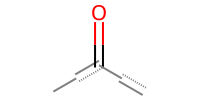

((7, 8, 9, 10), (12, 19, 20, 18))


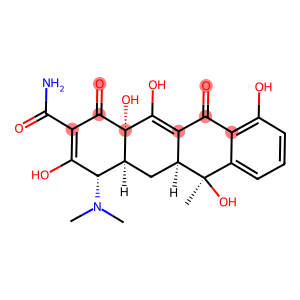

In [15]:
from rdkit.Chem import Draw

# SMARTS pattern for ketone
ketone_smarts = '[#6][CX3](=O)[#6]'
ketone_pattern = Chem.MolFromSmarts(ketone_smarts)
img = Draw.MolToImage(ketone_pattern, size=(200, 100))
display(img)

# Example molecule: Tetracycline
tetracycline = 'C[C@]1(c2cccc(c2C(=O)C3=C([C@]4([C@@H](C[C@@H]31)[C@@H](C(=C(C4=O)C(=O)N)O)N(C)C)O)O)O)O'
molecule = Chem.MolFromSmiles(tetracycline)

# Find substructure matches
matches = molecule.GetSubstructMatches(ketone_pattern)
print(matches)

# Visualize with highlights
Draw.MolToImage(molecule, highlightAtoms=[atom for match in matches for atom in match])


## Graph Representations

### Table of Contents

1. [Intro to Graphs](#intro-to-graphs)
2. [Molecular Graphs](#molecular-graphs)
3. [Advanced Topics for Molecular Graphs](#advanced-topics-for-molecular-graphs)

### Intro to Graphs

Graph theory is the study of graphs, which are mathematical structures used to model pairwise relationships between objects, represented by nodes (vertices) connected by edges (links). Moreover, graph theory provides a mathematical framework for modeling molecules as graphs, where atoms are represented as nodes (vertices) and bonds as edges. This representation facilitates the application of graph algorithms to study molecular properties and relationships. Concepts such as connectivity, cycles, and paths in graphs correspond to molecular features, making graph theory an essential tool in cheminformatics and structural bioinformatics.

Internally, computers represent graph data using structures like node lists and adjacency matrices:

- Node List: This is a simple list of all the nodes (vertices) in the graph, often storing additional data about each node, like labels or attributes. It provides a straightforward way to keep track of all nodes in the graph.

- Adjacency Matrix: This is a square matrix used to represent connections between nodes. Each row and column correspond to nodes in the node list. If there’s an edge between node $i$ and node $j$, the cell $(i,j)$ in the matrix is filled with a value (like 1 for an unweighted graph or edge's weight for a weighted graph). If there's no edge, the cell is filled with 0 or left empty.

Let's demonstrate graphs with a very simple example.

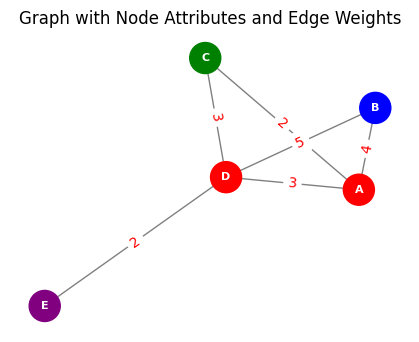

In [16]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt

# Create a new graph
G = nx.Graph()

# Add nodes with attributes (e.g., type or color)
G.add_node("A", type="City", color="red")
G.add_node("B", type="Town", color="blue")
G.add_node("C", type="Village", color="green")
G.add_node("D", type="City", color="red")
G.add_node("E", type="Metropolis", color="purple")

# Add edges with weights
G.add_edge("A", "B", weight=4)
G.add_edge("A", "C", weight=2)
G.add_edge("A", "D", weight=3)
G.add_edge("B", "D", weight=5)
G.add_edge("C", "D", weight=3)
G.add_edge("D", "E", weight=2)

# Extract node colors from attributes for visualization
node_colors = [data['color'] for _, data in G.nodes(data=True)]

# Extract edge weights for visualization
edge_labels = nx.get_edge_attributes(G, 'weight')

# Draw the graph with attributes and weights
plt.figure(figsize=(4, 3))
pos = nx.spring_layout(G)  # Position the nodes for better visualization
nx.draw(G, pos, with_labels=True, node_color=node_colors, 
        node_size=500, font_size=8, font_color='white', 
        font_weight='bold', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, 
                             font_size=10, font_color='red')
plt.title("Graph with Node Attributes and Edge Weights")
plt.show()

In [17]:
# Print graph nodes
print("Graph Nodes:")
print(G.nodes())

# Print adjacency matrix
print("Adjacency Matrix:")
adj_matrix = nx.adjacency_matrix(G)
print(adj_matrix.toarray())

Graph Nodes:
['A', 'B', 'C', 'D', 'E']
Adjacency Matrix:
[[0 4 2 3 0]
 [4 0 0 5 0]
 [2 0 0 3 0]
 [3 5 3 0 2]
 [0 0 0 2 0]]


### Molecular Graphs

Molecular graphs specifically represent chemical compounds, where vertices correspond to atoms and edges to bonds. This representation allows for the analysis of molecular structure using graph-based algorithms, such as calculating topological indices or detecting substructures. Molecular graphs can be used to model a wide range of chemical properties and are fundamental in the development of molecular descriptors and in the field of computational chemistry.

Now we have an idea what graphs are, it is intuitive to see how it relates to molecules. Let's make a graph that represents a molecule without using RDKit.

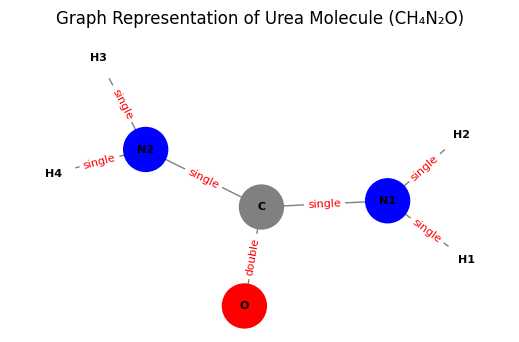

In [18]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt

# Create a new graph
G = nx.Graph()

# Add nodes representing atoms with labels for the element type
G.add_node("C", element="Carbon", color="gray")
G.add_node("N1", element="Nitrogen", color="blue")
G.add_node("N2", element="Nitrogen", color="blue")
G.add_node("O", element="Oxygen", color="red")
G.add_node("H1", element="Hydrogen", color="white")
G.add_node("H2", element="Hydrogen", color="white")
G.add_node("H3", element="Hydrogen", color="white")
G.add_node("H4", element="Hydrogen", color="white")

# Add edges representing bonds
G.add_edge("C", "N1", bond_type="single")  # C-N bond
G.add_edge("C", "N2", bond_type="single")  # C-N bond
G.add_edge("C", "O", bond_type="double")   # C=O double bond
G.add_edge("N1", "H1", bond_type="single") # N-H bonds
G.add_edge("N1", "H2", bond_type="single")
G.add_edge("N2", "H3", bond_type="single")
G.add_edge("N2", "H4", bond_type="single")

# Draw the graph
plt.figure(figsize=(5, 3))
pos = nx.spring_layout(G, seed=1)  # Position the nodes using a spring layout
nx.draw(G, pos, with_labels=True, 
        node_color=[data['color'] for _, data in G.nodes(data=True)],
        node_size=1000, font_size=8, font_color='black', 
        font_weight='bold', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, 
                             edge_labels={(u, v): d['bond_type'] for u, v, d in G.edges(data=True)}, 
                             font_color='red', font_size=8)
plt.title("Graph Representation of Urea Molecule (CH₄N₂O)")
plt.show()

In [19]:
## Here is how the computer sees the molecule
# Print graph nodes
print("Graph Nodes:")
print(G.nodes())

# Print adjacency matrix
print("Adjacency Matrix:")
adj_matrix = nx.adjacency_matrix(G)
print(adj_matrix.toarray())

Graph Nodes:
['C', 'N1', 'N2', 'O', 'H1', 'H2', 'H3', 'H4']
Adjacency Matrix:
[[0 1 1 1 0 0 0 0]
 [1 0 0 0 1 1 0 0]
 [1 0 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]]


### Advanced Topics for Molecular Graphs

##### Invariant and Equivariant Graph Representations

**Invariant Representations:**
- Definition: Representations that remain unchanged under transformations like rotations, translations, or permutations of the graph nodes.
- Application: Used in predicting molecular properties where the output should not change regardless of molecule orientation or atom ordering.
- Benefit: Ensures consistency and robustness in models by ignoring irrelevant variations in molecule representation.

**Equivariant Representations:**
- Definition: Representations that change predictably with transformations (e.g., rotations or reflections) of the graph, preserving geometric relationships.
- Application: Useful in tasks requiring spatial awareness, such as predicting molecular interactions or forces.
- Benefit: Captures directional and geometric properties accurately, enhancing the model's understanding of spatial dynamics.

These representations are crucial in advanced modeling tasks, ensuring that molecular graphs are handled in ways that reflect their physical and chemical properties accurately.

For the sake of simplicity, only a simple example of invariant representations is demonstrated in the following code cells. However, there are great reseources and papers that explain these topics in depth. One of the best summary and practice is from [TeachOpenCADD's talktorial T036](https://github.com/volkamerlab/teachopencadd/tree/master/teachopencadd/talktorials/T036_e3_equivariant_gnn). This tutorial goes through a good summary of these topics and demonstrates a great example how these representations can improve molecular modeling.

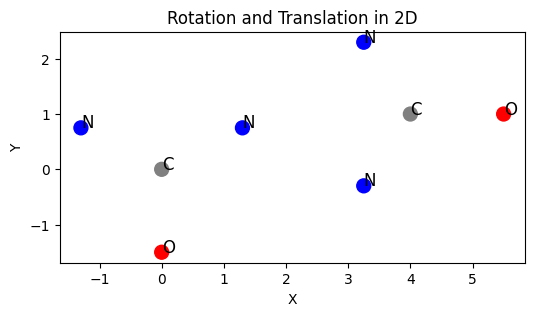

In [20]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem

# Create a urea molecule
urea_smiles = 'C(=O)(N)N'
urea_mol = Chem.MolFromSmiles(urea_smiles)

# Get the 2D atom coordinates
AllChem.Compute2DCoords(urea_mol)
atom_coords = urea_mol.GetConformer().GetPositions()

# Rotate and translate the molecule
rotation_matrix = np.array([[0, -1, 0], [1, 0, 0]])  # 90-degree rotation matrix
translation_vector = np.array([4, 1])  # Translation vector
transformed_coords = np.dot(atom_coords, rotation_matrix.T) + translation_vector

# Define atom colors
atom_colors = {'C': 'gray', 'O': 'red', 'N': 'blue', 'H': 'white'}

# Plot the atom coordinates
atom_labels = [atom.GetSymbol() for atom in urea_mol.GetAtoms()]
atom_colors = [atom_colors[label] for label in atom_labels]
atom_sizes = [100 for _ in atom_labels]  # Adjust the size of the atoms if needed

plt.figure(figsize=(6, 3))
plt.scatter(atom_coords[:, 0], atom_coords[:, 1], c=atom_colors, s=atom_sizes)
plt.scatter(transformed_coords[:, 0], transformed_coords[:, 1], c=atom_colors, s=atom_sizes)
for i, label in enumerate(atom_labels):
    plt.text(atom_coords[i, 0], atom_coords[i, 1], label, fontsize=12, color='black')
    plt.text(transformed_coords[i, 0], transformed_coords[i, 1], label, fontsize=12, color='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Rotation and Translation in 2D')
plt.show()



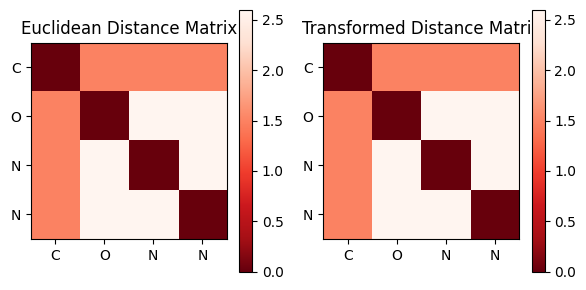

In [21]:
from sklearn.metrics import DistanceMetric

## let's take a look at the distance matrices
# Calculate the Euclidean distance matrix
euclidean = DistanceMetric.get_metric('euclidean')
dist_matrix = euclidean.pairwise(atom_coords)
transformed_dist_mat = euclidean.pairwise(transformed_coords)

# Plot the distance matrix
plt.figure(figsize=(6, 3))
plt.subplot(121)
plt.imshow(dist_matrix, cmap='Reds_r', origin='upper')
plt.xticks(range(len(atom_coords)), atom_labels)
plt.yticks(range(len(atom_coords)), atom_labels)
plt.colorbar()
plt.title('Euclidean Distance Matrix')
plt.subplot(122)
plt.imshow(transformed_dist_mat, cmap='Reds_r', origin='upper')
plt.xticks(range(len(transformed_coords)), atom_labels)
plt.yticks(range(len(transformed_coords)), atom_labels)
plt.colorbar()
plt.title('Transformed Distance Matrix')
plt.tight_layout()
plt.show()
